In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
res = {}
with open("experiments_no_time_20_5.json", 'r') as f:
    res[1,20,5] = json.load(f)
with open("experiments_no_time_10_5.json", 'r') as f:
    res[1,10,5] = json.load(f)
with open("experiments_no_time_20_3.json", 'r') as f:
    res[1,20,3] = json.load(f)
with open("experiments_no_time_10_3.json", 'r') as f:
    res[1,10,3] = json.load(f)
with open("experiments_4_time_windows_20_5.json", 'r') as f:
    res[4,20,5] = json.load(f)
with open("experiments_4_time_windows_10_5.json", 'r') as f:
    res[4,10,5] = json.load(f)
with open("experiments_4_time_windows_20_3.json", 'r') as f:
    res[4,20,3] = json.load(f)
with open("experiments_4_time_windows_10_3.json", 'r') as f:
    res[4,10,3] = json.load(f)

Mean Packages
(1, 20, 5) : 26.49
(1, 10, 5) : 20.89
(1, 20, 3) : 34.28
(1, 10, 3) : 16.68
(4, 20, 5) : 33.84
(4, 10, 5) : 16.68
(4, 20, 3) : 33.37
(4, 10, 3) : 14.97


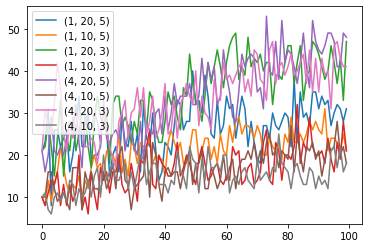

In [3]:
print("Mean Packages")
for i,r in res.items():
    print(i, ":", np.mean([day[f'day{i}_0']['number_of_packages'] for i,day in enumerate(r)]))
    plt.plot([day[f'day{i}_0']['number_of_packages'] for i,day in enumerate(r)], label=i)
plt.legend()


Mean Vehicles Used
(1, 20, 5) : 2.59
(1, 10, 5) : 1.91
(1, 20, 3) : 2.62
(1, 10, 3) : 1.83
(4, 20, 5) : 3.44
(4, 10, 5) : 2.3
(4, 20, 3) : 2.99
(4, 10, 3) : 2.34


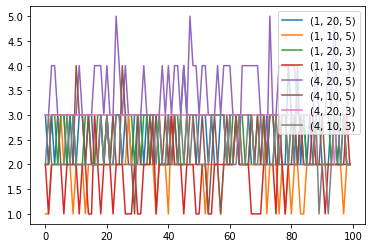

In [4]:
print("Mean Vehicles Used")
for i,r in res.items():
    print(i, ":", np.mean([sum(np.array(day[f'day{i}_0']['deliveries_attempted']) > 0) for i,day in enumerate(r)]))
    plt.plot([sum(np.array(day[f'day{i}_0']['deliveries_attempted']) > 0) for i,day in enumerate(r)], label=i)
plt.legend()

In [5]:
print("Mean Days Takes")
for i,r in res.items():
    days_taken = reduce(lambda a,b: a+b, (day[f'day{i}_0']['delivered_packages']['days_taken'] for i,day in enumerate(r)))
    print(i, ":", np.mean(days_taken))

Mean Days Takes
(1, 20, 5) : 0.11862695608278648
(1, 10, 5) : 0.3130434782608696
(1, 20, 3) : 0.2011776251226693
(1, 10, 3) : 0.12369172216936251
(4, 20, 5) : 0.18881804806277588
(4, 10, 5) : 0.1228600201409869
(4, 20, 3) : 0.31170805879371516
(4, 10, 3) : 0.2722672064777328


In [ ]:
for i,r in res.items():
    total_packages = sum((day[f'day{i}_0']['number_of_packages'] for i,day in enumerate(r))